In [22]:
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

garden = pd.read_csv('Cultivate LA Sites April 1 2017.csv')

In [23]:
garden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   objectid  1140 non-null   int64  
 1   name      1123 non-null   object 
 2   address   1140 non-null   object 
 3   lng       1140 non-null   float64
 4   lat       1140 non-null   float64
 5   type_     1139 non-null   object 
 6   subtype_  354 non-null    object 
 7   source    1015 non-null   object 
 8   verified  1130 non-null   object 
 9   exisitng  15 non-null     object 
 10  contact   161 non-null    object 
 11  website   18 non-null     object 
 12  comment_  4 non-null      object 
 13  city      1078 non-null   object 
 14  state     1078 non-null   object 
 15  zip       1078 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 142.6+ KB


In [25]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(garden['lng'], garden['lat'])]

# Coordinate reference system : WGS84
crs = 'epsg:4326'

# Creating a Geographic data frame 
garden = gpd.GeoDataFrame(garden, crs=crs, geometry=geometry)

In [26]:
garden.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   objectid  1140 non-null   int64   
 1   name      1123 non-null   object  
 2   address   1140 non-null   object  
 3   lng       1140 non-null   float64 
 4   lat       1140 non-null   float64 
 5   type_     1139 non-null   object  
 6   subtype_  354 non-null    object  
 7   source    1015 non-null   object  
 8   verified  1130 non-null   object  
 9   exisitng  15 non-null     object  
 10  contact   161 non-null    object  
 11  website   18 non-null     object  
 12  comment_  4 non-null      object  
 13  city      1078 non-null   object  
 14  state     1078 non-null   object  
 15  zip       1078 non-null   object  
 16  geometry  1140 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(13)
memory usage: 151.5+ KB


<AxesSubplot:>

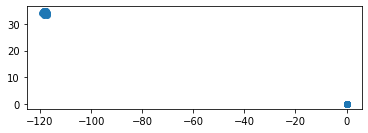

In [27]:
garden.plot()

In [30]:
# identify the outlier
garden[garden.lat == 0]
garden[garden.lng == 0]

,objectid,name,address,lng,lat,type_,subtype_,source,verified,exisitng,contact,website,comment_,city,state,zip,geometry
57,59,Marengo School Garden,1400 Marengo Avenue,0.0,0.0,School Garden,NaN,NaN,Not Viewed,New Site,"Rachel Surls,",NaN,test site,South Pasadena,CA,91030-3951,POINT (0.00000 0.00000)
117,119,Braeridge Farms,1331 Braeridge Dr.,0.0,0.0,Farm,NaN,NaN,Not Viewed,New Site,Dr. David Gadish,NaN,NaN,Beverly Hills,California,90210,POINT (0.00000 0.00000)
118,120,Rachel's Office,700 West Main Street,0.0,0.0,Farm,NaN,NaN,Not Viewed,New Site,Rachel Surls ramabie@ucanr.edu 626-586-1982,NaN,Test Case,Alhambra,California,91801,POINT (0.00000 0.00000)
119,121,Kit Carson Elementary School,3530 W 147th St.,0.0,0.0,School Garden,NaN,NaN,Not Viewed,New Site,(310) 973-1300 x50053,NaN,NaN,Lawndale,CA,90064,POINT (0.00000 0.00000)
120,122,Jane Addams Middle School,4535 W. 153rd Pl.,0.0,0.0,School Garden,NaN,NaN,Not Viewed,New Site,(310) 973-1300,NaN,NaN,Lawndale,CA,90064,POINT (0.00000 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,2340,"Uncommon Good, Site #14",615 W. San Jose Ave.,0.0,0.0,Farm,NaN,NaN,NaN,NaN,Nancy Mintie,www.uncommongood.org,NaN,Claremont,CA,91711,POINT (0.00000 0.00000)
1136,2341,"Uncommon Good, Site #15","1601 N. Indian Hill Blvd.,",0.0,0.0,Farm,NaN,NaN,NaN,NaN,Nancy Mintie,www.uncommongood.org,NaN,Claremont,CA,91711-2784,POINT (0.00000 0.00000)
1137,2342,"Uncommon Good, Site #16",333 North College Way,0.0,0.0,Farm,NaN,NaN,NaN,NaN,Nancy Mintie,www.uncommongood.org,NaN,Claremont,CA,91711-4429,POINT (0.00000 0.00000)
1138,3527,John R. Wooden High School,18741 Elkwood Street,0.0,0.0,School Garden,High,NaN,Verified,New Site,Karen Snook,kindredspiritscarefarm.org,Kindred Spirits Care Farm partners with John R...,Reseda,CA,91335,POINT (0.00000 0.00000)


In [32]:
gdf = garden[garden.lng != 0]

<AxesSubplot:>

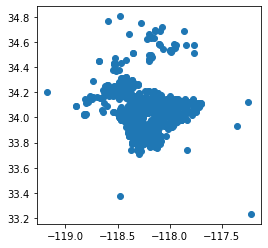

In [33]:
gdf.plot()

In [34]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich